# Financial Planning

In [15]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools1 import MCSimulation

%matplotlib inline

In [16]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [17]:
# Set current amount of crypto assets
crypto_assets = {
    'BTC': 1.2,
    'ETH': 5.3
}


In [18]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [19]:
# Fetch current BTC，ETH price
requests.get(btc_url)
requests.get(eth_url)

# Execute GET request and store response
response_BTC_Data = requests.get(btc_url)
response_ETH_Data = requests.get(eth_url)

# Use json function from json library to format
import json
response_BTC_Data.json()
response_ETH_Data.json()
BTC_Data = response_BTC_Data.json()
ETH_Data = response_ETH_Data.json()
#print(json.dumps(BTC_Data, indent=4))
#print(json.dumps(ETH_Data, indent=4))  make sure I can clearly see the key

# Compute current value of my crpto
btc_price = BTC_Data["data"]['1']['quotes']['CAD']['price']
eth_price = ETH_Data ['data']['1027']['quotes']['CAD']['price']

print(f"Current BTC Price: ${btc_price} CAD")
print(f"Current ETH Price: ${eth_price} CAD")

my_btc = crypto_assets['BTC']
my_eth = crypto_assets['ETH']
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

Current BTC Price: $35159.3385 CAD
Current ETH Price: $2364.428495 CAD


In [20]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is worth ${my_btc_value:0.2f} CAD")
print(f"The current value of your {my_eth} ETH is worth ${my_eth_value:0.2f} CAD")

The current value of your 1.2 BTC is worth $42191.21 CAD
The current value of your 5.3 ETH is worth $12531.47 CAD


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [21]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [22]:

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")




Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [23]:
# Format current date as ISO format
today = pd.Timestamp("2022-06-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)



# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2022-06-09 04:00:00+00:00  102.07  102.22  101.97  102.05  5420517   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-06-09 04:00:00+00:00       17713  102.086353  409.34  411.74  401.44   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-06-09 04:00:00+00:00  401.44  85991523      577695  406.845749

In [24]:
shares = {
    'AGG': 200,
    'SPY': 50
}
# Pick AGG and SPY close 

agg_close_price = df_portfolio["AGG"]["close"].iloc[-1]
spy_close_price = df_portfolio["SPY"]["close"].iloc[-1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $102.05
Current SPY closing price: $401.44


In [25]:
# Compute the current value of shares
my_spy = shares["SPY"]
my_agg = shares["AGG"]
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is worth ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is worth ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is worth $20072.00
The current value of your 200 AGG shares is worth $20410.00


### Savings Health Analysis

In [26]:
# Set monthly household income
monthly_income = 12000

# Calculate the total value of crypto assets
crypto_total_value = my_btc_value + my_eth_value

# Calculate the total value of shares
shares_total_value = my_spy_value + my_agg_value

# Create the df_savings DataFrame
df_savings = pd.DataFrame({'Amount': [crypto_total_value, shares_total_value]}, index=['Crypto', 'Shares'])

# Display the savings DataFrame
df_savings

,Amount
Crypto,54722.677223
Shares,40482.000000


<Axes: title={'center': ' My Portfolio Composition'}, ylabel='Amount'>

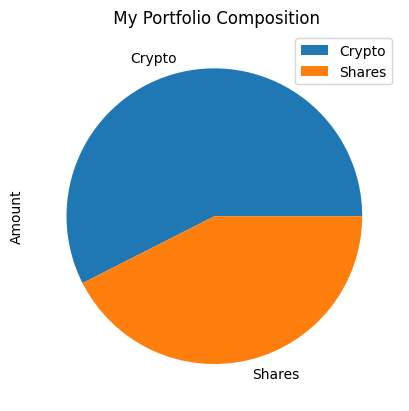

In [27]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title=" My Portfolio Composition")

In [28]:
# Validate saving health
def saving_health(monthly_income):
    emergency_fund = monthly_income * 3 # Set ideal emergency fund
    total_savings = df_savings['Amount'].sum() # Calculate total amount of savings
   
    if total_savings > emergency_fund:
        print("Congratulations! You have enough savings to cover the emergency fund.")
    elif total_savings == emergency_fund:
        print("You have savings, but it is recommended to save more to reach the emergency fund goal.")
    else:
        print("You need to save more to reach both your monthly income and emergency fund goals.")

saving_health(12000) # call the funcation and set my monthly income to $12000

Congratulations! You have enough savings to cover the emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [29]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [31]:
# Get 5 years' worth of historical data for SPY and AGG
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG, ], axis=1, keys=["SPY","AGG",])

# Display sample data
df_stock_data.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.92  208.18  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   

                                                                     
                             close   volume trade_count        vwap  
timestamp                                                            
2016-05-02 04:00:00+00:00  110.605  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.810  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.860  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.140  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.970  2718710       12697  111.031967

In [40]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns with 50/50 assets allocation
MC_30years_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5,.5],
    num_simulation = 1000,
    num_trading_days = 252*30
)


In [41]:
# Printing the simulation input data
MC_30years_dist.portfolio_data.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.92  208.18  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.008707  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005574  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000195  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                             \
                               high       low    close   volume trade_count   
timestamp                                                                     
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.605  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.810  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.860  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.140  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.970  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001853  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [42]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006220,1.006771,0.998102,1.003111,1.004201,1.005354,1.000568,1.001140,0.994158,0.999872,...,0.998622,0.988565,1.008088,0.989508,1.003079,1.002757,1.001844,1.000230,1.007777,0.993762
2,1.005657,1.011554,0.999349,0.995776,0.997980,0.999813,0.998082,1.004736,0.983091,0.990950,...,1.002964,0.992341,1.009071,0.981991,1.000934,0.993447,1.006054,1.005244,1.015549,0.994872
3,1.008849,1.018953,0.999971,0.992664,0.996411,1.006455,0.996060,1.004650,0.981214,0.994334,...,1.000435,1.000926,1.009414,0.992105,1.010137,0.990893,1.002670,1.011111,1.016798,0.991142
4,1.015781,1.019460,1.002840,1.002235,1.003067,1.010680,1.002031,1.003065,0.985525,0.994140,...,1.007246,1.003099,1.011637,0.989459,1.016171,0.991115,1.002565,1.007181,1.018594,1.001911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.403341,13.298064,11.137022,9.014973,20.995186,10.125025,14.085422,8.649872,8.765009,10.154410,...,26.516223,13.902125,24.835844,8.181739,18.221774,12.448631,15.788283,7.413249,19.232499,5.821095
7557,8.394092,13.362357,11.099519,9.057192,20.920934,9.977508,14.034378,8.625589,8.776737,10.137767,...,26.675814,13.963314,24.730107,8.118438,18.122847,12.521554,15.840062,7.349480,19.066646,5.885963
7558,8.414455,13.251437,10.992492,9.071103,20.889043,10.015150,14.017883,8.667223,8.783409,10.118483,...,26.721831,14.112205,24.837028,8.198586,18.207558,12.553323,16.069118,7.296722,19.171729,5.874052
7559,8.453314,13.133361,10.992393,9.033014,20.921810,10.109011,14.049567,8.659684,8.753497,10.114049,...,26.659821,14.138295,24.550303,8.206369,18.269326,12.600078,16.199934,7.248365,18.967876,5.973033


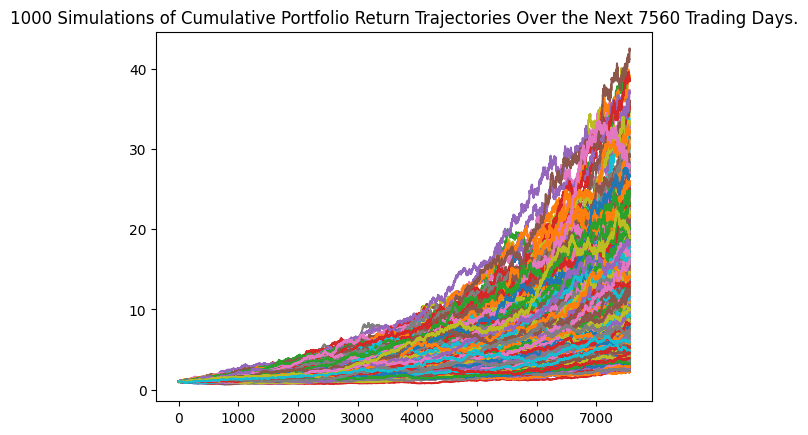

In [139]:
# Plot simulation outcomes
line_plot_30years = MC_30years_dist.plot_simulation()

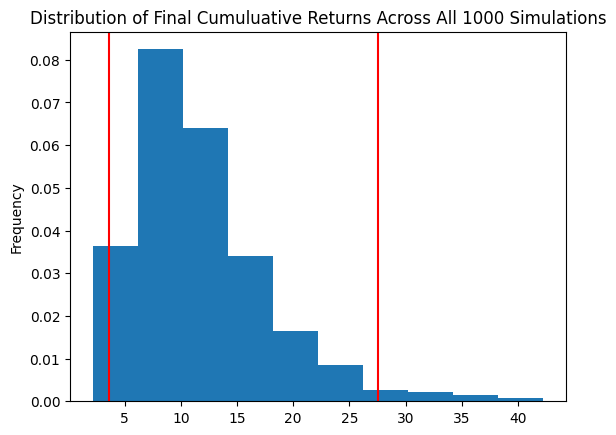

In [140]:
# Plot probability distribution and confidence intervals
dist_plot_30years = MC_30years_dist.plot_distribution()

### Retirement Analysis

In [172]:
# Fetch summary statistics from the Monte Carlo simulation results
even_30years_tbl = MC_30years_dist.summarize_cumulative_return()

# Print summary statistics
print(even_30years_tbl)

count           1000.000000
mean              11.742278
std                6.103668
min                2.141101
25%                7.422403
50%               10.584911
75%               14.447049
max               42.282844
95% CI Lower       3.631067
95% CI Upper      27.544672
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [173]:
# Set initial investment
initial_investment1_1 = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_I1 = round(even_tbl[8]*initial_investment1_1,2)
ci_upper_I1 = round(even_tbl[9]*initial_investment1_1,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment1_1} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_I1} and ${ci_upper_I1}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $24813.2 and $76841.39


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [174]:
# Set initial investment
initial_investment2_1 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment2_1,2)
ci_upper = round(even_tbl[9]*initial_investment2_1,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2_1} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $37219.8 and $115262.09


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [137]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5,.5],
    num_simulation = 1000,
    num_trading_days = 252*5
)



In [138]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996983,0.999890,1.001031,0.997817,0.997145,1.001936,0.993518,1.000172,0.998705,0.993046,...,0.985551,1.001773,0.998451,0.997417,1.007283,1.000650,0.999933,0.991862,1.007062,1.002683
2,1.003219,1.000252,0.989682,0.999565,1.003565,1.002152,0.998195,1.000913,1.000042,0.995564,...,0.995399,1.009821,0.993885,0.986912,1.009898,1.007549,1.006879,0.993185,1.014232,0.994714
3,1.000511,0.999384,0.979876,1.000660,1.002689,1.009398,1.004963,1.003520,0.999268,0.990854,...,0.989512,1.013374,0.992149,0.981003,1.010368,1.011113,1.005913,0.991114,1.012458,0.988457
4,1.001899,1.002658,0.990174,1.007724,1.006049,1.004977,1.007690,0.997626,0.989657,0.987576,...,0.999200,1.007734,0.988000,0.983570,1.005854,1.013219,0.991720,0.987673,1.009902,0.982223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.950911,1.012738,1.610861,1.652152,1.495143,1.059350,1.992649,1.704434,1.329051,1.508681,...,1.590423,1.488610,1.294120,1.301256,1.889474,1.614017,1.090114,2.105660,1.337568,1.728296
1257,0.948770,1.004447,1.617060,1.660006,1.493925,1.047949,1.993568,1.722194,1.323989,1.515944,...,1.600543,1.484799,1.274214,1.297548,1.878485,1.629792,1.097570,2.106416,1.337999,1.716396
1258,0.954596,1.005960,1.618451,1.665168,1.490181,1.037719,1.967391,1.704329,1.322580,1.496255,...,1.600432,1.484020,1.271335,1.298075,1.877231,1.621953,1.109386,2.126345,1.344839,1.707412
1259,0.963786,1.009982,1.622956,1.680955,1.487073,1.048076,1.963988,1.712682,1.310835,1.508059,...,1.606193,1.494062,1.263083,1.300043,1.885892,1.624336,1.115863,2.128396,1.347327,1.704540


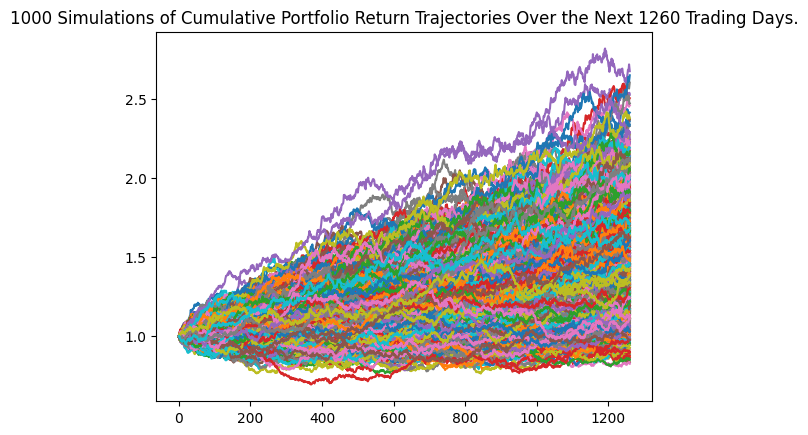

In [142]:
# Plot simulation outcomes
line_plot_5years = MC_5years_dist.plot_simulation()

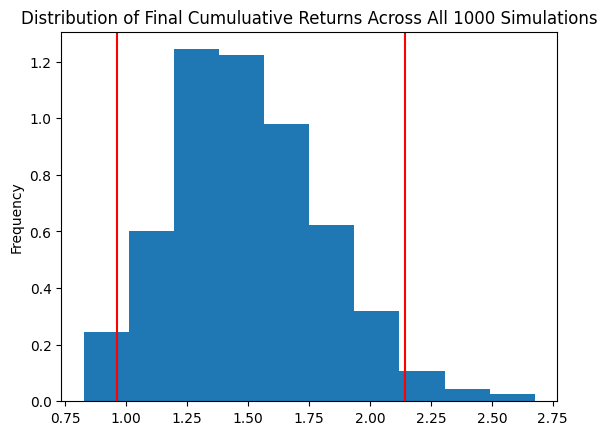

In [143]:
# Plot probability distribution and confidence intervals
dist_plot_5years = MC_5years_dist.plot_distribution()

In [147]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_5years = MC_5years_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_5years)

count           1000.000000
mean               1.499820
std                0.310220
min                0.826367
25%                1.281767
50%                1.463361
75%                1.694626
max                2.676014
95% CI Lower       0.963887
95% CI Upper       2.143296
Name: 1260, dtype: float64


In [169]:
# Set initial investment
initial_investment3 = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_5years[8]*initial_investment3,2)
ci_upper_five = round(even_tbl_5years[9]*initial_investment3,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment3} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $19277.74 and $42865.92


### Ten Years Retirement Option

In [177]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5,.5],
    num_simulation = 1000,
    num_trading_days = 252*10
)

In [178]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001860,1.001757,1.000360,1.000389,1.009909,0.991948,0.997903,1.004986,1.009160,0.995050,...,1.007859,1.010408,0.999560,0.992034,1.010123,1.003955,0.991976,0.988409,1.005070,0.997957
2,0.999661,1.008982,1.005385,1.008418,0.996305,0.999304,1.002543,1.007311,1.007510,0.988461,...,1.004093,1.005387,1.006923,0.981932,0.998200,1.008110,0.996998,0.987104,1.003551,1.002592
3,1.001454,1.007804,1.010205,1.013374,0.997073,0.998473,1.005332,0.995392,1.006188,0.983837,...,1.009611,1.003411,0.999004,0.986348,0.987773,1.016802,0.985586,0.975899,1.013419,1.004747
4,0.999190,1.012115,1.008045,1.009170,0.994285,1.006730,0.999492,0.996281,1.004972,0.978648,...,1.007500,1.007355,0.988854,0.987330,0.994549,1.019408,0.972679,0.980116,1.009286,0.998659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.480503,1.450800,3.256255,2.273226,1.227512,2.254023,1.651323,3.301857,2.556107,2.314268,...,1.893161,2.136939,2.370809,2.481930,1.563368,2.042342,3.075561,1.657973,1.271402,1.660606
2517,1.471669,1.453673,3.248194,2.286215,1.220063,2.252715,1.655109,3.307456,2.538425,2.298101,...,1.886016,2.130030,2.363323,2.489986,1.567924,2.024525,3.077003,1.658134,1.281569,1.665918
2518,1.487371,1.453277,3.256786,2.293938,1.225988,2.255163,1.661241,3.360276,2.552699,2.312883,...,1.886674,2.138950,2.386367,2.514572,1.580730,2.014606,3.065969,1.657849,1.291496,1.650808
2519,1.499928,1.452520,3.245809,2.294088,1.216205,2.231408,1.667427,3.409291,2.551897,2.322503,...,1.879944,2.150510,2.398443,2.512840,1.594779,1.999335,3.065155,1.670362,1.290680,1.661362


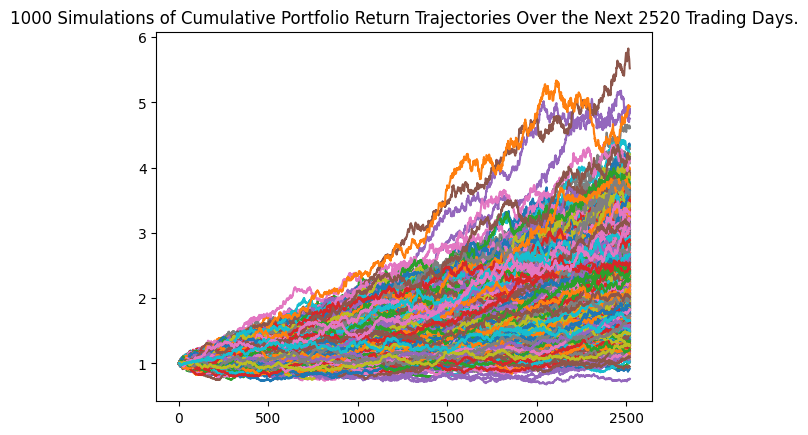

In [179]:
# Plot simulation outcomes
line_plot_10years = MC_10years_dist.plot_simulation()

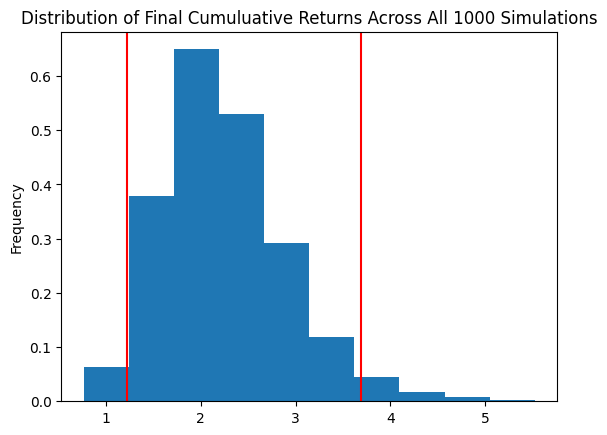

In [180]:
# Plot probability distribution and confidence intervals
dist_plot_10years = MC_10years_dist.plot_distribution()

In [181]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_10years = MC_10years_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_10years)

count           1000.000000
mean               2.243410
std                0.649596
min                0.764826
25%                1.789574
50%                2.170725
75%                2.610674
max                5.523376
95% CI Lower       1.223583
95% CI Upper       3.694941
Name: 2520, dtype: float64


In [182]:
# Set initial investment
initial_investment4 = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_10years[8]*initial_investment4,2)
ci_upper_ten = round(even_tbl_10years[9]*initial_investment4,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment4} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $24471.66 and $73898.82


# Summarize finding across all 3 simulations

In [183]:
# Even weighted stocks 5 years 
print(f"There is a 95% chance that an initial investment of ${initial_investment3} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

print('*'*50)

# Even weighted stocks 10 years 
print(f"There is a 95% chance that an initial investment of ${initial_investment4} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

print('*'*50)

# Even weighted stocks 30 years 
print(f"There is a 95% chance that an initial investment of ${initial_investment1_1} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_I1} and ${ci_upper_I1}")

print(f"There is a 95% chance that an initial investment of ${initial_investment2_1} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")
print('*'*50)


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $19277.74 and $42865.92
**************************************************
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $24471.66 and $73898.82
**************************************************
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $24813.2 and $76841.39
There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $37219.8 and $115262.09
**************************************************


## Looking across all 3 simulations, we evenly invest AGG and SPY, over 5, 10, 30 years with $20000, they most efficient way to get early retired is 10years invest interval, if you want to retire within 5 years, you need to raise your intial capital !